In [160]:
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
data = pd.read_csv('log.csv')

data.head()

# delete first row

data = data.drop(data.index[0])


# remove nans

Text(0.5, 1.0, 'ups and particles over time')

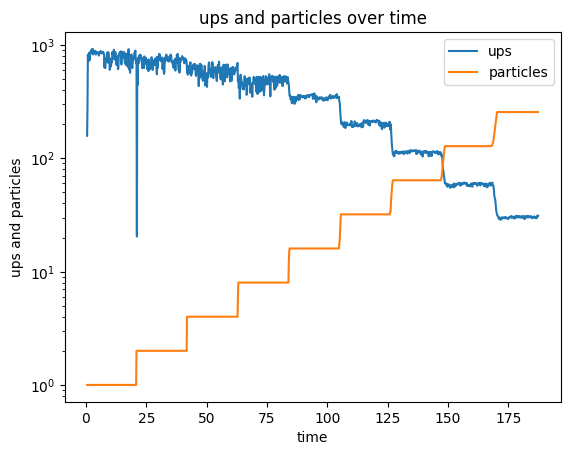

In [162]:
plt.plot(data['time_game'], data['ups'])
plt.plot(data['time_game'], data['particles'])

# set log y scale
plt.yscale('log')

plt.legend(['ups', 'particles'])
plt.xlabel('time')
plt.ylabel('ups and particles')
plt.title('ups and particles over time')

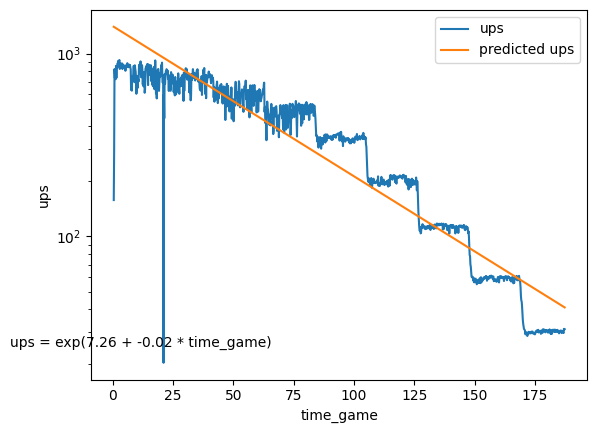

In [163]:
# fit a curve to predict ups from particles
import numpy as np

from sklearn.linear_model import LinearRegression

X = (data['time_game']).values.reshape(-1, 1)
y = np.log(data['ups'])


model = LinearRegression().fit(X, y)

plt.plot(data['time_game'], data['ups'])
plt.plot(data['time_game'], np.exp(model.predict(X)))

plt.yscale('log')

plt.legend(['ups', 'predicted ups'])
plt.xlabel('time_game')
plt.ylabel('ups')


# add formula
plt.text(
    0.1, 0.1, f'ups = exp({model.intercept_:.2f} + {model.coef_[0]:.2f} * time_game)',
    horizontalalignment='center',
    verticalalignment='center',
    transform=plt.gca().transAxes
)


def ups_from_particles(particles):
    return np.exp(model.predict(np.log(particles).reshape(-1, 1)))[0]

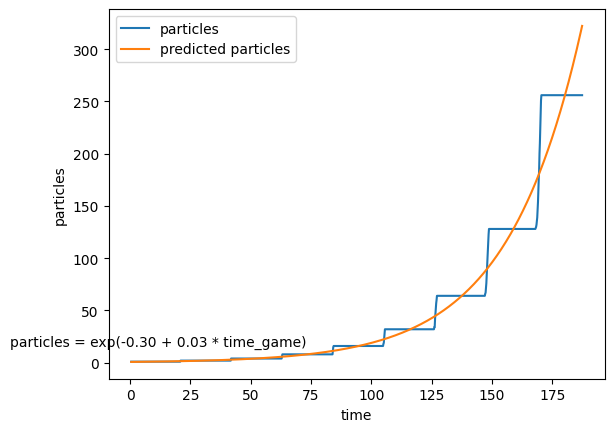

In [164]:
# fit a curve to determine number of particles

X = (data['time_game']).values.reshape(-1, 1)
y = np.log(data['particles'])

model_part_time_game = LinearRegression().fit(X, y)

plt.plot(data['time_game'], data['particles'])
plt.plot(data['time_game'], np.exp(model_part_time_game.predict(X)))


plt.legend(['particles', 'predicted particles'])
plt.xlabel('time')
plt.ylabel('particles')

# add formula
plt.text(
    0.1, 0.1, f'particles = exp({model_part_time_game.intercept_:.2f} + {model_part_time_game.coef_[0]:.2f} * time_game)',
    horizontalalignment='center',
    verticalalignment='center',
    transform=plt.gca().transAxes
)


def particles_from_time_game(time_game):
    return np.exp(model_part_time_game.predict((time_game).reshape(-1, 1)))[0]

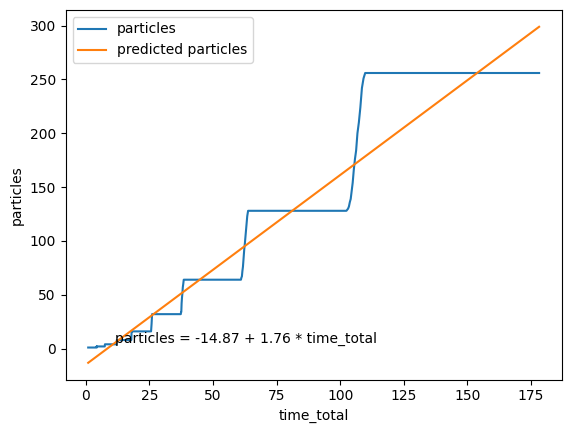

In [165]:
# fit a curve to determine number of particles

X = (data['time_total']).values.reshape(-1, 1)
y = (data['particles'])

model_time_total_particle = LinearRegression().fit(X, y)

plt.plot(data['time_total'], data['particles'])
plt.plot(data['time_total'], model_time_total_particle.predict(X))


plt.legend(['particles', 'predicted particles'])
plt.xlabel('time_total')
plt.ylabel('particles')

# add formula
plt.text(
    0.1, 0.1, f'particles = {model_time_total_particle.intercept_:.2f} + {model_time_total_particle.coef_[0]:.2f} * time_total', transform=plt.gca().transAxes)


def particles_from_time_total(time_total):
    return model_time_total_particle.predict(np.array([time_total]).reshape(-1, 1))[0]


def time_total_from_particles(particles):
    return (particles - model_time_total_particle.intercept_) / model_time_total_particle.coef_[0]

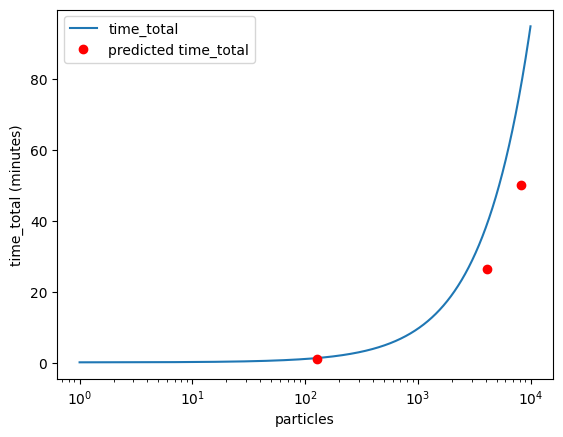

In [166]:
# how long to reach 1e6 particles?

p = np.arange(1, 1e4, 1)
t = np.array([time_total_from_particles(p)/60 for p in p])

plt.plot(p, t)


plt.plot(8192, 50, 'ro')
plt.plot(4096, 26.3, 'ro')
plt.plot(128, 1.1, 'ro')

plt.xscale('log')


plt.legend(['time_total', 'predicted time_total'])
plt.xlabel('particles')
plt.ylabel('time_total (minutes)')

plt.show()

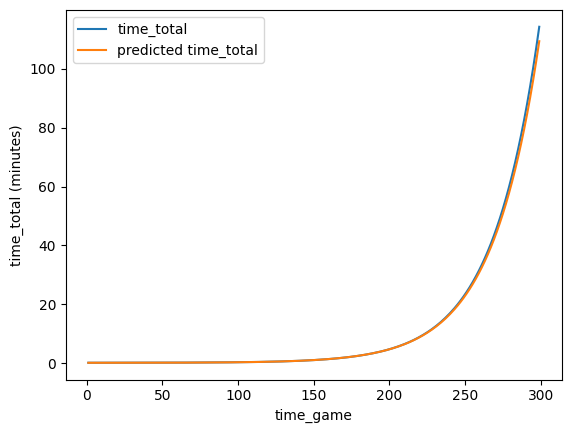

In [176]:
gt = np.arange(1, 300, 1)

tt = [(time_total_from_particles(particles_from_time_game(g))) / 60 for g in gt]


# (exp(-0.31 + 0.03 * time_game)  +12.01)/1.61  = time_total


y_closed = (np.exp(-0.31 + 0.032 * gt) + 12.01) / 1.6 / 60
particles = [particles_from_time_game(g) for g in gt]


plt.plot(gt, tt)
plt.plot(gt, y_closed)

# plt.yscale('log')

plt.legend(['time_total', 'predicted time_total'])
plt.xlabel('time_game')
plt.ylabel('time_total (minutes)')

plt.show()